In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv('FuelConsumption.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


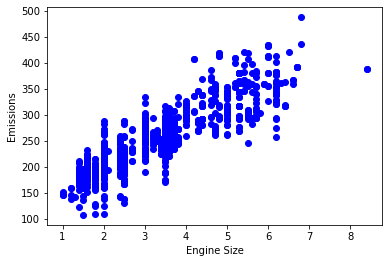

In [3]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

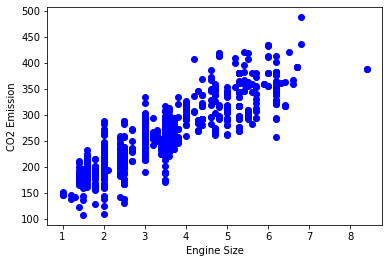

In [5]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

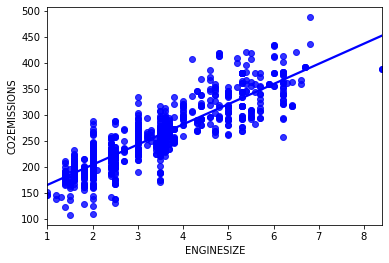

In [6]:
sns.regplot(x=train.ENGINESIZE,
y=train.CO2EMISSIONS, ci=None, color="b")

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[11.60121162  6.88403993  9.52696191]]


In [8]:
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y)) 

Residual sum squares: 442.81
Variance score: 0.89


In [9]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.65478886  6.52763569  6.16712626  3.08025076]]
Residual sum of squares: 444.59
Variance score: 0.89


In [10]:
#notttt
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [11]:
x=train.ENGINESIZE
y=train.CO2EMISSIONS

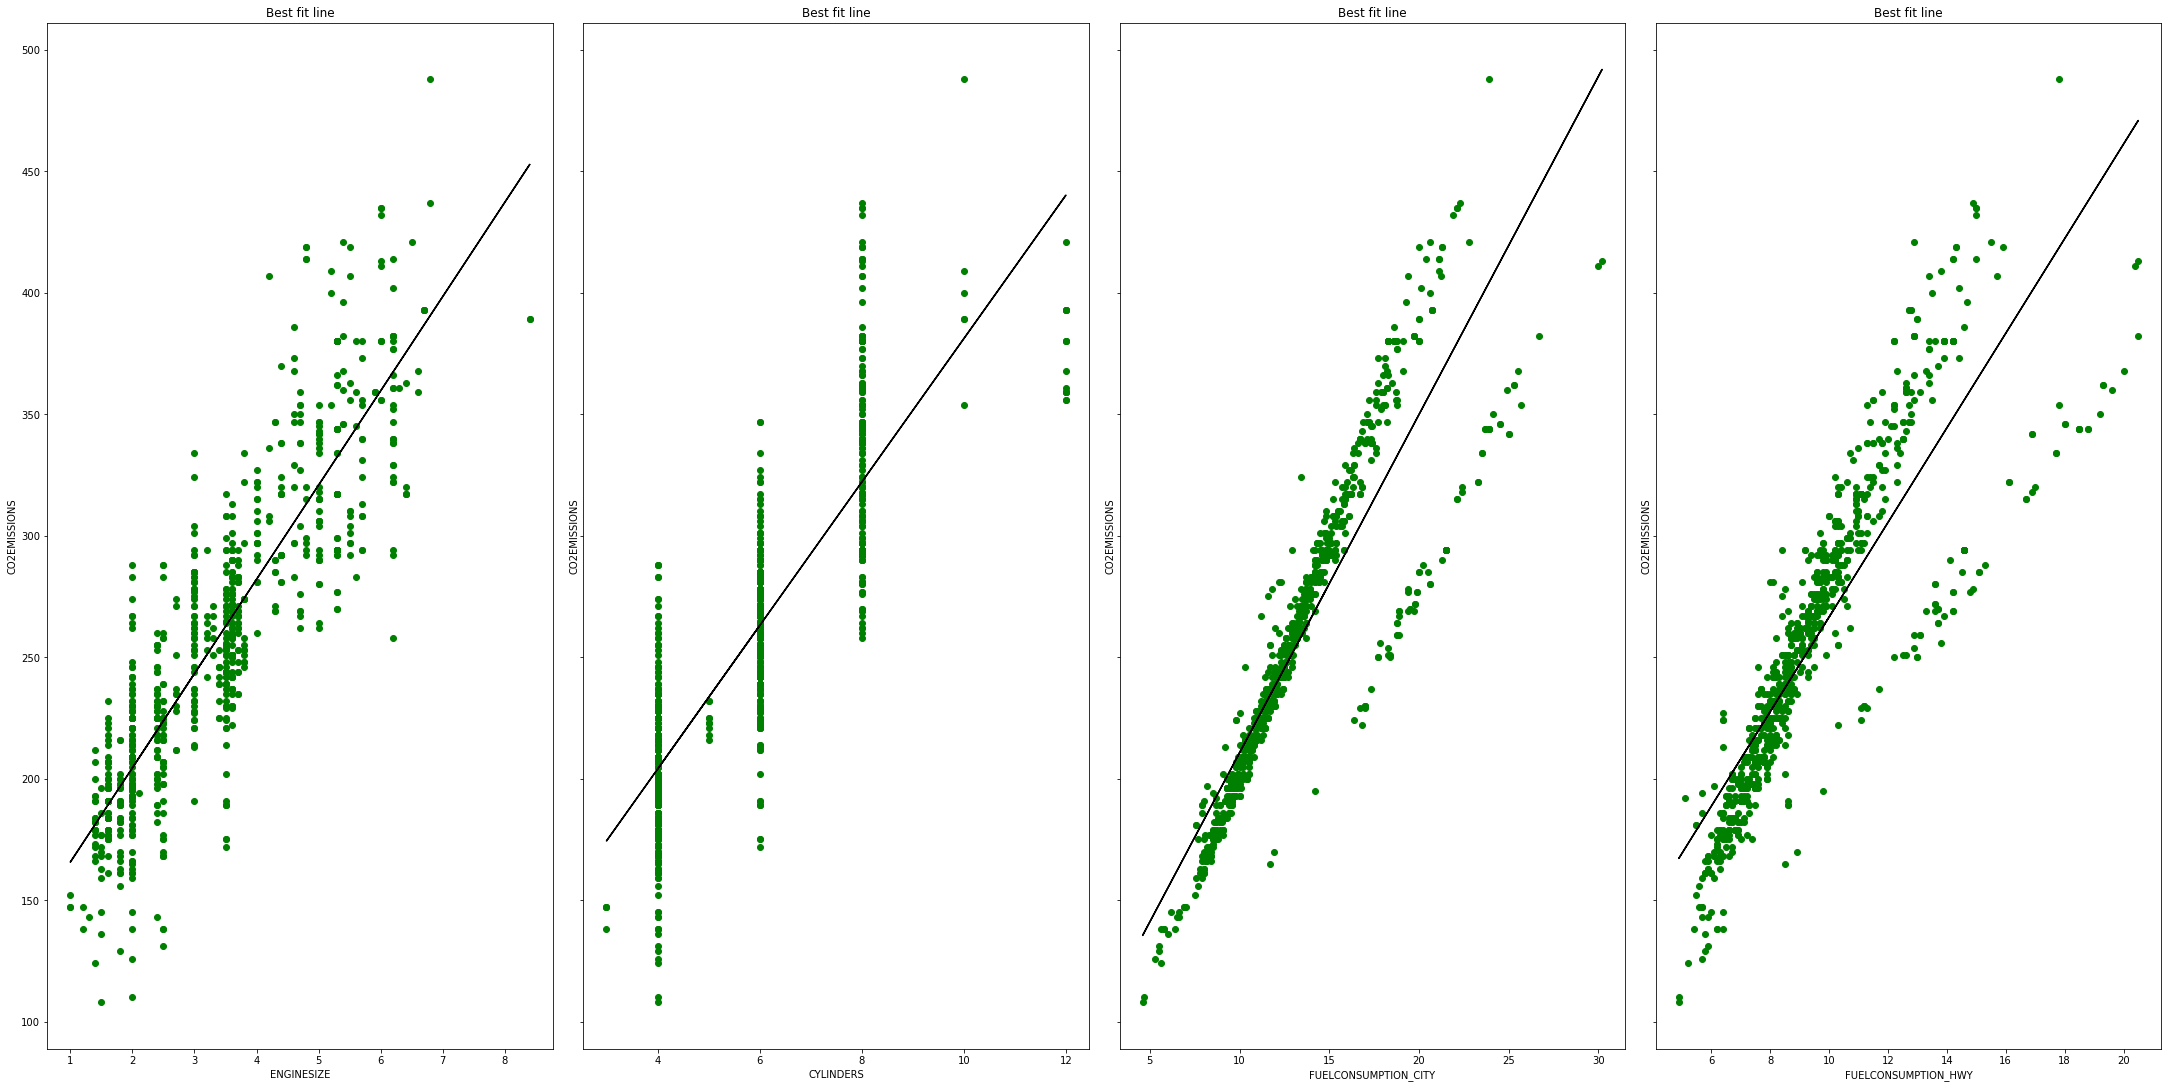

In [12]:
from sklearn.linear_model import LinearRegression
train_copy = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
train_copy =pd.get_dummies(train_copy)
train_copy=train_copy.fillna(0)
linear_regr_test = LinearRegression()

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('CO2EMISSIONS')
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')